### Import Examples for Quant Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

### Feature Engineering Example

But why work with returns when we already have the prices?  
The reason is that prices are usually non-stationary, that is when statistics such as mean and variance (mathematical moments) change over time.

In [ ]:
# create simple and log returns, multiplied by 100 for convenience
df['simple_rtn'] = 100 * df.adj_close.pct_change()
df['log_rtn'] = 100 * (np.log(df.adj_close) - np.log(df.adj_close.shift(1)))

### Importance of Data/Feature Engineering  

Different types of data for different ml algos  
* Decision Trees: split at threshold of feature, createing multiple nested 'if' statements as rules
* Neural Network: adjusts weights fo feature and combination of features, creating a matrix for predictions  

Normalize, Scale and Center Data  
* Normalize: take from absolute to relative values  
        * The opening price was $20 below yesterday's closing price (not normalized)  
        Most of time use Mean: 0 and Variance: 1  
        Other times want the variables bound between 0 and 1  
        * The opening price was 2% bellow yesterday's closing price (normalized)  
* Scale: adjust distribution/range of feature to a standard size (needed for NNets not DTrees)
        * Can use quantiles to more robustly account for outliers
* Center: adjust mean of feature to 0 (needed for NNets, not DTrees)  
* Feature Engineering: NNets can engineer features (combine weights from different features), DTrees cannot create new features, just organize different rules based on sets of features(features dependent on each others

### Plotly Candlestick Example

In [ ]:
fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Time Outside Home')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'AZ Avg Time Away'], name='AZ Avg Time Away', line=dict(width=4)))
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'CO Avg Time Away'], name='CO Avg Time Away', line=dict(width=4)))
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'NAT Avg Time Away'], name='NAT Avg Time Away', line=dict(width=4)))

fig.add_trace(go.Scatter(x=cov_az.date, y=(cov_az.loc[:,'new_case_rate']/500), name='AZ New Covid Case Rate', line=dict(dash='dash', color='blue')))
fig.add_trace(go.Scatter(x=cov_co.date, y=(cov_co.loc[:,'new_case_rate']/500), name='CO New Covid Case Rate', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=cov_nat.date, y=(cov_nat.loc[:,'new_case_rate']/500), name='NAT New Covid Case Rate', line=dict(dash='dash', color='green')))
#fig = px.line(covid_co, x='date', y=['new_case_count','death_count'])

fig.update_layout(
        title='Change in Time Outside Home vs New Covid Case Rate',
        xaxis=dict(showline=True, showgrid=False, showticklabels=True), 
        xaxis_title='Date',
        yaxis_title='% Change Relative to January 2020',
        plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Time Outside Home')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.bar(ui_pua_view, x='date', y=Pan_Unemploy_Assist, title='Pandemic Unemployment Assistance')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Initial Claims')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.area(consum_spend_view, x='date', y=['AZ Consumer Spending', 'CO Consumer Spending', 'National Consumer Spending'], title='Spending Differences After Covid (A.C.)', width=1400, height=500)

fig.update_xaxes(title_text='Date') #labels={'x': 'Date', 'y':'Year Over Year Spending Difference'}
fig.update_yaxes(title_text='Year Over Year Spending Difference')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Middle Band'], line=dict(color='blue', width=0.7), name='Middle Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], line=dict(color='red', width=1.5), name='Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], line=dict(color='green', width=1.5), name='Lower Band (Buy)'))

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='market data'))

fig.update_layout(title='Bollinger Band Strategy', yaxis_title='Jacobs Engineering Stock Price (USD per Shares)')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                        buttons=list([
                                dict(count=1, label='1m', step='month', stepmode='backward'),
                                dict(count=6, label='6m', step='month', stepmode='backward'),
                                dict(count=1, label='YTD', step='year', stepmode='todate'),
                                dict(count=1, label='1y', step='year', stepmode='backward'),
                                dict(step='all')
                                    ])
                                    )
                )

fig.show()

# Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import investpy as ipy
import datetime as dt
import requests

import plotly.io as pio
pio.templates

import plotly as py
import plotly.io as pio
pio.templates
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected=True)

In [2]:
# How far back can we get bitcoin data?
# data = yf.download(tickers='AAPL', period='max', interval='1d')
# data = yf.download(tickers='AAPL', start='2021-07-01', end='2021-07-08', threads=False)

data = ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2013', to_date='01/01/2020')

data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2013-01-01,13.5,13.6,13.2,13.3,28406,USD
2013-01-02,13.3,13.4,13.2,13.3,17967,USD
2013-01-03,13.3,13.5,13.3,13.4,18032,USD
2013-01-04,13.4,13.5,13.3,13.5,29642,USD
2013-01-05,13.5,13.6,13.3,13.4,21330,USD


# EDA

In [17]:
df = pd.DataFrame(data['Close'])
df['Simple Return'] = 100 * df.Close.pct_change()
df['Log Return'] = 100 * (np.log(df.Close) - np.log(df.Close.shift(1)))

df

,Close,Simple Return,Log Return
Date,,,
2013-01-01,13.3,NaN,NaN
2013-01-02,13.3,0.000000,0.000000
2013-01-03,13.4,0.751880,0.749067
2013-01-04,13.5,0.746269,0.743498
2013-01-05,13.4,-0.740741,-0.743498
...,...,...,...
2019-12-28,7321.5,0.823499,0.820126
2019-12-29,7397.5,1.038039,1.032688
2019-12-30,7261.8,-1.834404,-1.851437


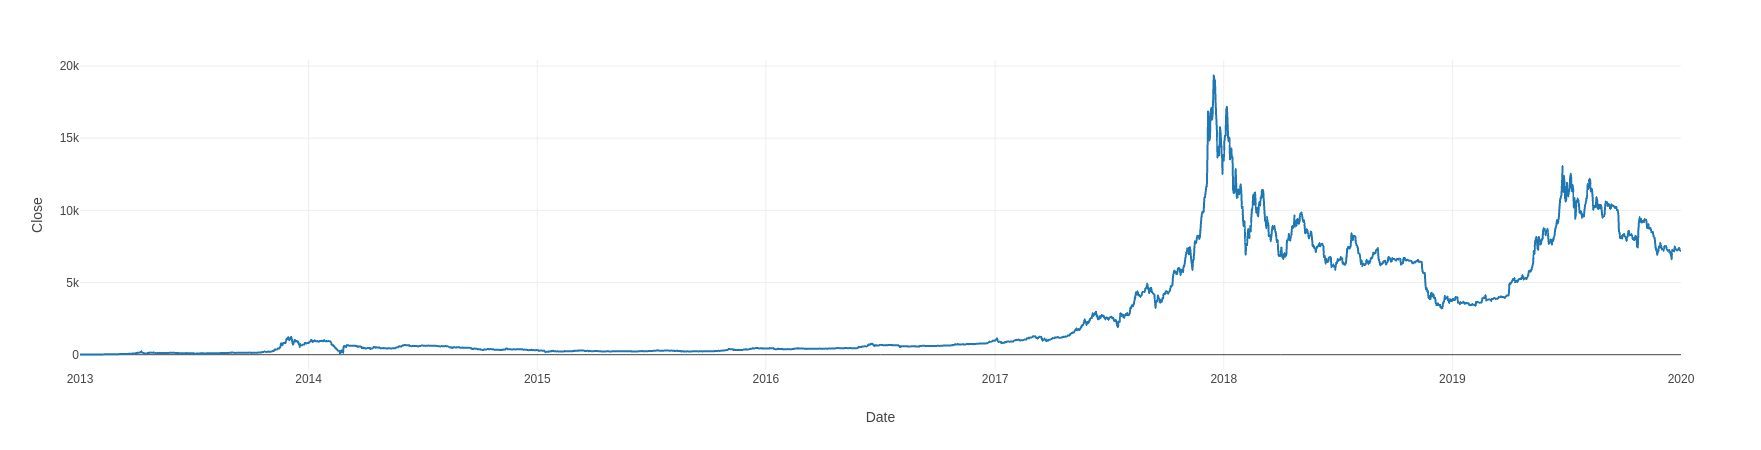

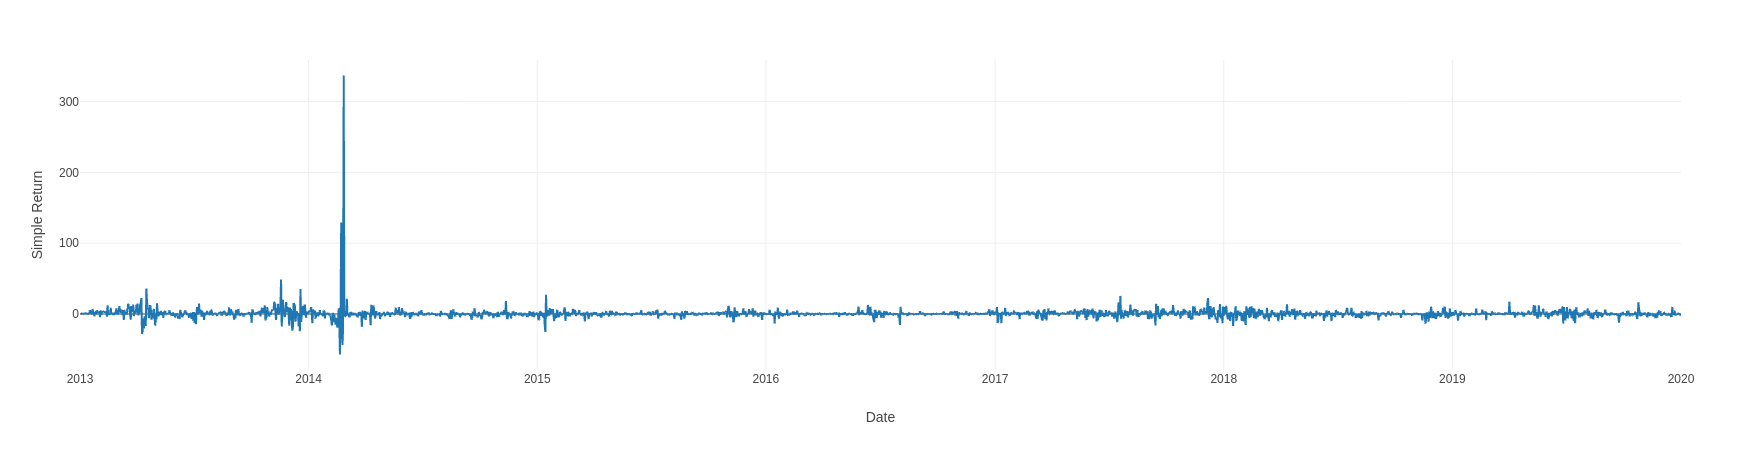

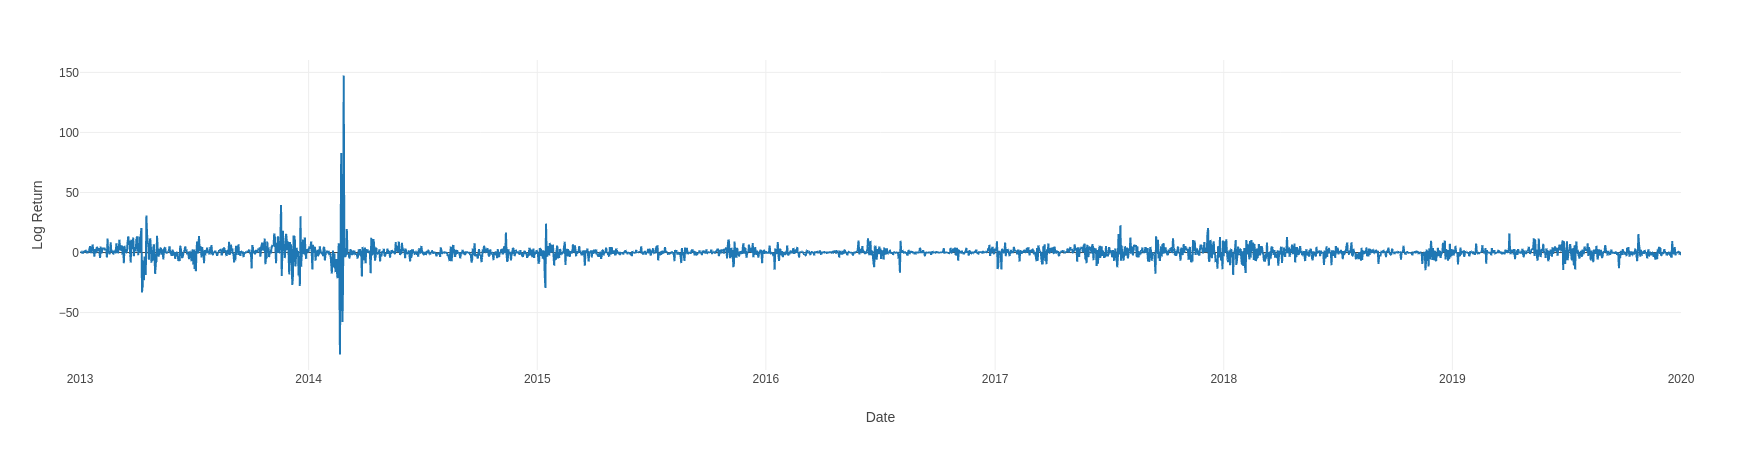

In [34]:
# fig = px.line(data, x=data.index, y=data['Close'], title='Bitcoin Closing Price')
# #fig.update_xaxes(title_text='Date', nticks=16)
# fig.update_yaxes(title_text='Price in USD ($)')
# fig.update_layout(plot_bgcolor='white')
# fig.show()

# for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
#     fig = px.scatter(df_2007,
#                      x="gdpPercap", y="lifeExp", size="pop", color="continent",
#                      log_x=True, size_max=60,
#                      template=template, title="Gapminder 2007: '%s' theme" % template)
#     fig.show()

for column in df.columns:
    
    fig = px.line(df, x=data.index, y=df[column], template='none')
    fig.show()

# fig = px.line(data.index, y=data['Close'], title='Bitcoin Closing Price', template='plotly')
# fig.update_yaxes(title_text='Price in USD ($)')
# fig.show()

# Baseline Model

# Time Series Analysis

# ARIMA

# Regularized Regression

# Logistic Regression

# Decision Tree

# Random Forest

# Random Forest Boosted

# LSTM

# Fast Fourier

# Transformer